In [40]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

# Merging all data in single file 

In [2]:
df = pd.read_csv("./Data/Sales_April_2019.csv")
df.shape

(18383, 6)

In [3]:
files = [i for i in os.listdir("./Data")]

data = pd.DataFrame()

for f in files :
    df = pd.read_csv("./Data/"+f)
    data = pd.concat([data,df])
    
data.head()

data.to_csv("data.csv",index=False)

## Read the complted data

In [4]:
data = pd.read_csv("data.csv")

In [24]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [31]:
# fropping all vlaues where Order datr =Or
data = data[data['Order Date'].str[0:2] !='Or']

(185950, 7)

## Adding more columns 

### column for month only


In [27]:
data['month'] = data['Order Date'].str[0:2]


In [32]:
# converting to the month colummn to int

data['month'] = data['month'].astype(int)

In [35]:
### Adding a colum for sales

# conveting data types to numeric
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] =  pd.to_numeric(data['Price Each'])

data['sales'] = data['Quantity Ordered'] * data['Price Each']

## Adding column for city

In [63]:
data['city'] = data['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


# Analysis

## what was the best month for sales ?

In [99]:
results=data.groupby('month').sum()

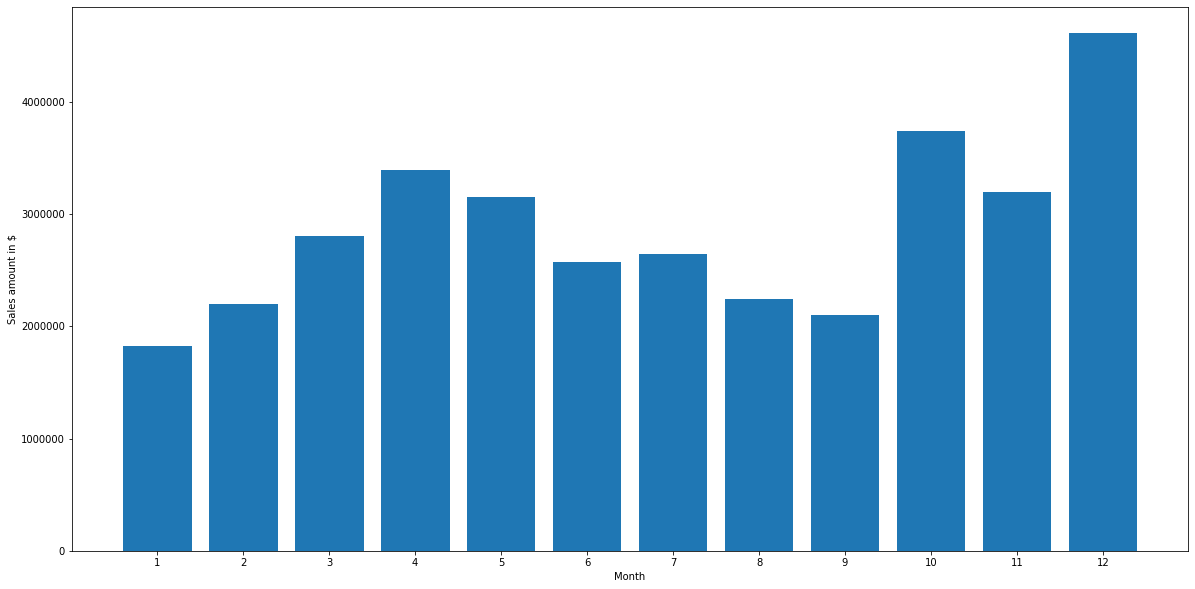

In [101]:
# plotting the sales
plt.figure(figsize=(20,10))
months = range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales amount in $")
plt.show()

## which city had the higest sales?

In [65]:
results=data.groupby('city').sum()
results

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


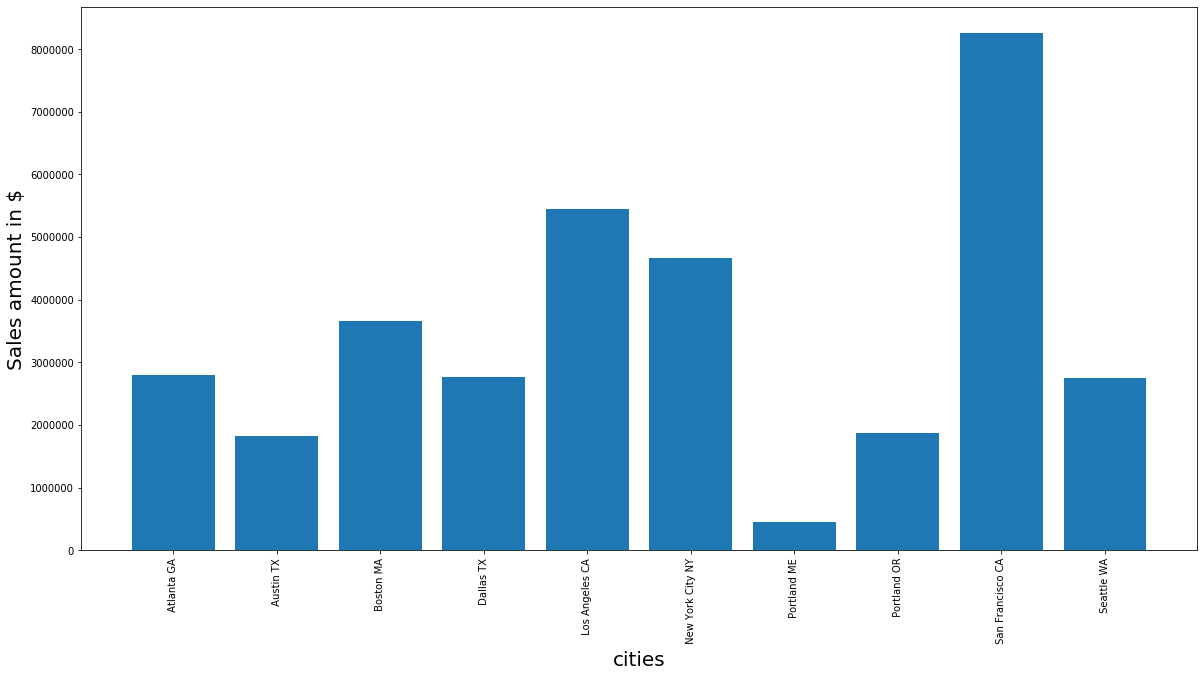

In [95]:
# plotting the sales

city = [city for city,df in data.groupby('city')]
plt.figure(figsize=(20,10))
plt.bar(city,results['sales'])
plt.xticks(city,rotation = 'vertical')
plt.xlabel("cities",size= 20)
plt.ylabel("Sales amount in $", size=20)
plt.show()

## At what tuime adverstisment should be displayed for maximum likelihood of product purchase?

In [80]:
# changing dtype of order date to datetime

data['Order Date'] = pd.to_datetime(data['Order Date'])

In [85]:
data['hour'] = data['Order Date'].dt.hour
data['minutes'] = data['Order Date'].dt.minute

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


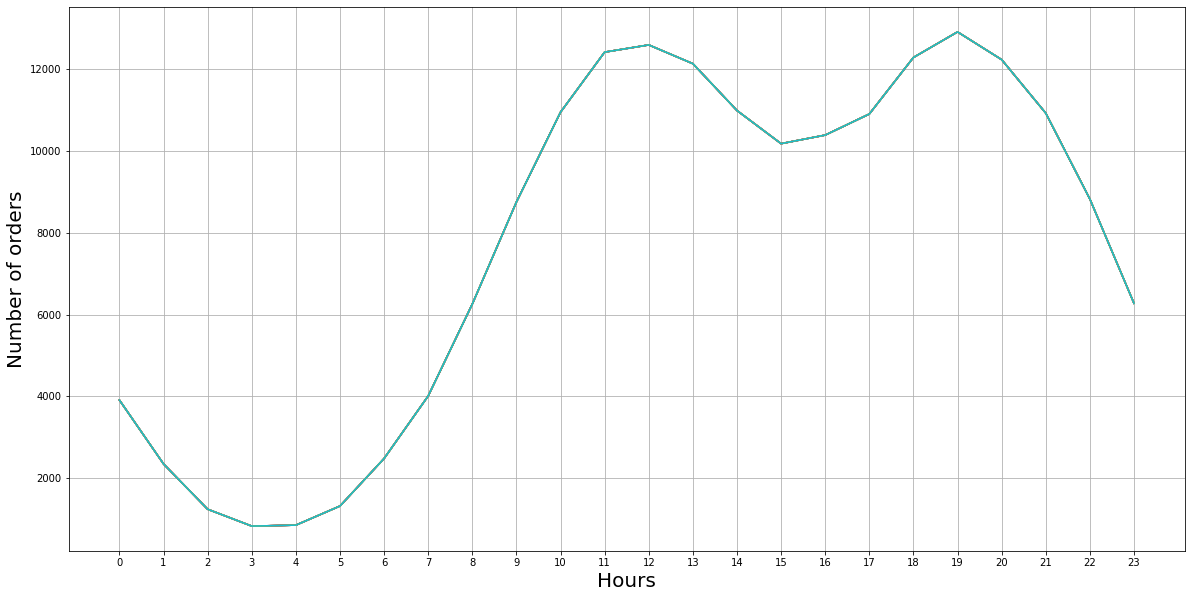

In [102]:
# plotting the sales

hours = [hour for hour,df in data.groupby('hour')]
plt.figure(figsize=(20,10))
plt.plot(hours,data.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel("Hours",size= 20)
plt.ylabel("Number of orders", size=20)


plt.grid()


plt.show()

## Which products are most often sold together?

In [145]:
df = data[data['Order ID'].duplicated(keep=False)]

df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','grouped']].drop_duplicates()



C:\Users\deepshri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(7136, 2)

In [154]:
# getting the pair count

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product was sold most and why?

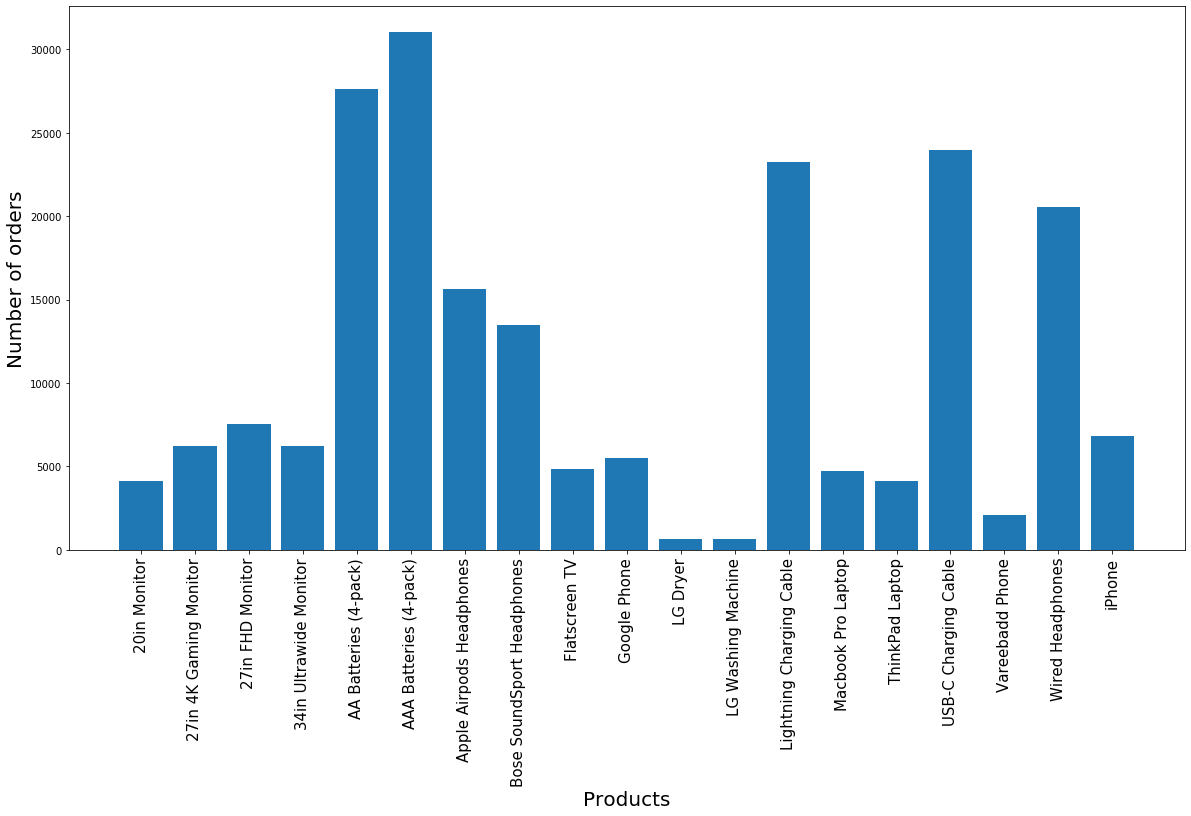

In [220]:
product_group = data.groupby('Product')
quantity_orderd = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]
plt.figure(figsize=(20,10))
plt.bar(products,quantity_orderd)
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Products",size= 20)
plt.ylabel("Number of orders", size=20)

plt.show()


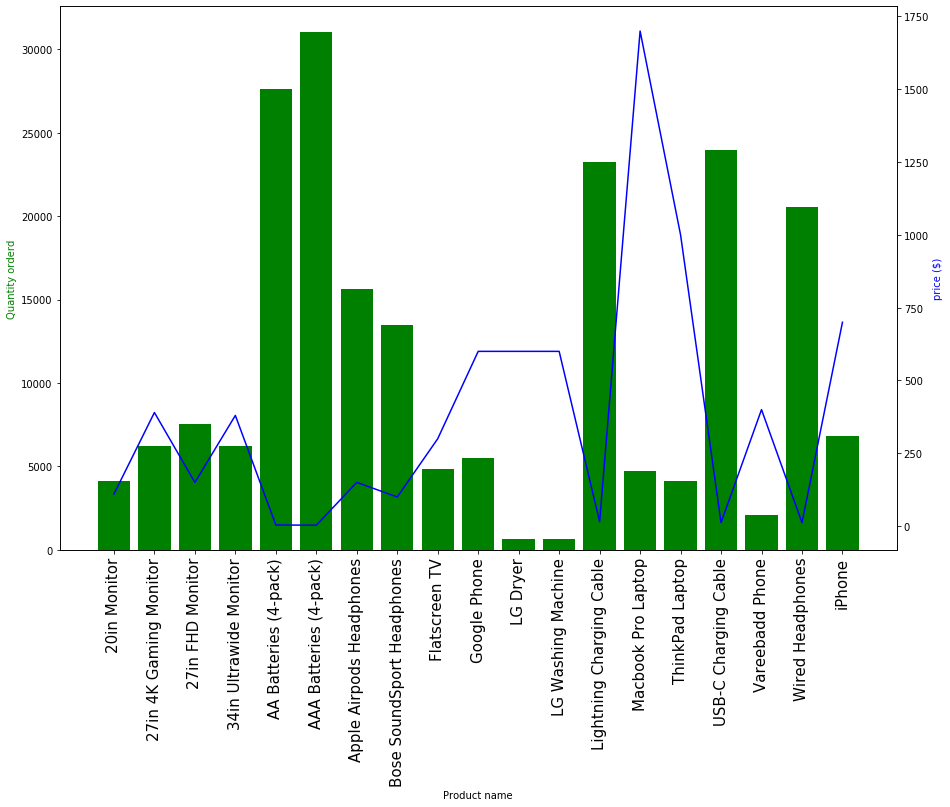

In [254]:
# price of each item

prices = data.groupby('Product').mean()['Price Each']

fig, ax = plt.subplots()
ax1=ax.twinx()
ax.bar(products,quantity_orderd,color='g')
ax1.plot(products,prices,'b-')

fig.set_figheight(10)
fig.set_figwidth(15)

ax.set_xlabel('Product name')
ax.set_ylabel('Quantity orderd' ,color='g')
ax1.set_ylabel('price ($)', color='b')
ax.set_xticklabels(products,rotation='vertical',size=15)



plt.show()
